In [29]:
%matplotlib inline
import xarray as xr
import os
import numpy as np
import matplotlib.pyplot as plt
import collections

import cartopy
import cartopy.crs as ccrs
from cartopy.feature import NaturalEarthFeature, RIVERS

## Load Global Data ##

In [30]:
global_direc = '/p/home/gergel/data/scientific_computing/TBOT/global'

tbot_hist_file_global = xr.open_mfdataset(os.path.join(global_direc, 'b.e11.B20TRC5CNBDRD*'),
                                  concat_dim='ensemble_member')
tbot_hist_global = tbot_hist_file_global['TBOT'].sel(time=slice('1976-09-01', '2005-08-31'))

tbot_1pt5_file_global = xr.open_mfdataset(os.path.join(global_direc, 'b.e11.BRCP26C5CNBDRD.f09_g16.1pt5degC*'),
                                  concat_dim='ensemble_member')
tbot_1pt5_global = tbot_1pt5_file_global['TBOT'].sel(time=slice('2070-09-01', '2099-08-31'))

tbot_2pt0_file_global = xr.open_mfdataset(os.path.join(global_direc, 'b.e11.BRCP26C5CNBDRD.f09_g16.2pt0degC*'),
                                  concat_dim='ensemble_member')
tbot_2pt0_global = tbot_2pt0_file_global['TBOT'].sel(time=slice('2070-09-01', '2099-08-31'))

## Calculate Difference in Annual Means ## 

In [31]:
tbot_diff_1pt5_global = tbot_1pt5_global.mean('time') - tbot_hist_global.mean('time')
tbot_diff_2pt0_global = tbot_2pt0_global.mean('time') - tbot_hist_global.mean('time')

## Calculate Difference in Seasonal Means ## 

In [32]:
tbot_seasonaldiff_1pt5_global = tbot_1pt5_global.groupby('time.season').mean('time')
tbot_seasonaldiff_2pt0_global = tbot_2pt0_global.groupby('time.season').mean('time')

## Calculate Ensemble Mean of Annual Means ## 

In [33]:
tbot_diff_1pt5_global_mean = tbot_diff_1pt5_global.mean('ensemble_member')
tbot_diff_2pt0_global_mean = tbot_diff_2pt0_global.mean('ensemble_member')

## Plot temperature differences for the mean across ensemble members globally ##

Text(0.5, 1.0, '$2.0\\degree$')

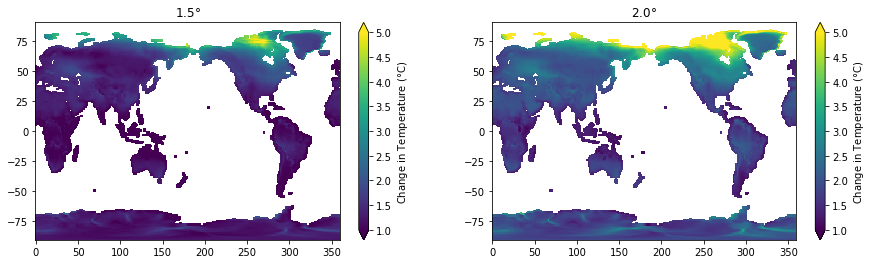

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

plt.sca(axes[0])
tbot_diff_1pt5_global_mean.plot(add_labels=False, 
                                cbar_kwargs={'label': 'Change in Temperature ($\degree$C)'}, 
                                cmap='viridis', 
                                vmin=1, vmax=5)


axes[0].set_title('$1.5\degree$')

plt.sca(axes[1])
tbot_diff_2pt0_global_mean.plot(add_labels=False, 
                                cbar_kwargs={'label': 'Change in Temperature ($\degree$C)'}, 
                                cmap='viridis', vmin = 1, vmax = 5)
axes[1].set_title('$2.0\degree$')

## Same as before, but for the RASM (Regional Arctic System Model) pan-Arctic domain ##

## Load Global Data ##

In [35]:
rasm_direc = '/p/home/gergel/data/scientific_computing/TBOT/arctic'

tbot_hist_file_rasm = xr.open_mfdataset(os.path.join(rasm_direc, 'TBOT0*'),
                                  concat_dim='ensemble_member')
tbot_hist_rasm = tbot_hist_file_rasm['TBOT'].sel(time=slice('1976-09-01', '2005-08-31'))

tbot_1pt5_file_rasm = xr.open_mfdataset(os.path.join(rasm_direc, 'TBOT.1pt5degC*'),
                                  concat_dim='ensemble_member')
tbot_1pt5_rasm = tbot_1pt5_file_rasm['TBOT'].sel(time=slice('2070-09-01', '2099-08-31'))

tbot_2pt0_file_rasm = xr.open_mfdataset(os.path.join(rasm_direc, 'TBOT.2pt0degC*'),
                                  concat_dim='ensemble_member')
tbot_2pt0_rasm = tbot_2pt0_file_rasm['TBOT'].sel(time=slice('2070-09-01', '2099-08-31'))

## Calculate Difference in Annual Means ## 

In [36]:
tbot_diff_1pt5_rasm = tbot_1pt5_rasm.mean('time') - tbot_hist_rasm.mean('time')
tbot_diff_2pt0_rasm = tbot_2pt0_rasm.mean('time') - tbot_hist_rasm.mean('time')

## Calculate Difference in Seasonal Means ## 

In [37]:
tbot_seasonaldiff_1pt5_rasm = tbot_1pt5_rasm.groupby('time.season').mean('time')
tbot_seasonaldiff_2pt0_rasm = tbot_2pt0_rasm.groupby('time.season').mean('time')

## Calculate Ensemble Mean of Annual Means ## 

In [38]:
tbot_diff_1pt5_rasm_mean = tbot_diff_1pt5_rasm.mean('ensemble_member')
tbot_diff_2pt0_rasm_mean = tbot_diff_2pt0_rasm.mean('ensemble_member')

## Set up special `cartopy` projection for the RASM domain ##

In [39]:
scale = '50m'

plt.rcParams.update({'mathtext.default':  'regular' })

class Rasm(ccrs.Projection):

    def __init__(self):

        proj4_params = {'R': 6371200.0,
                        'lat_0': 90.0,
                        'lat_1': 90,
                        'lat_2': 90,
                        'lon_0': -114.0+360,
                        'proj': 'lcc',
                        'units': 'm',
                        'x_0': 9469302.950316086,
                        'y_0': 6201952.603370549}

        super(Rasm, self).__init__(proj4_params)

    @property
    def boundary(self):
        coords = ((self.x_limits[0], self.y_limits[0]),(self.x_limits[1], self.y_limits[0]),
                  (self.x_limits[1], self.y_limits[1]),(self.x_limits[0], self.y_limits[1]),
                  (self.x_limits[0], self.y_limits[0]))

        return ccrs.sgeom.Polygon(coords).exterior

    @property
    def threshold(self):
        return 100000.0

    @property
    def x_limits(self):
        return (0, 16423961.103252266)

    @property
    def y_limits(self):
        return (0, 12228062.194885937)

## Plot temperature differences for the mean across ensemble members for the RASM domain ##

"fig.savefig(os.path.join(plot_direc, \n                         'tbot_mean.png'), bbox_inches='tight', dpi=dpi)"

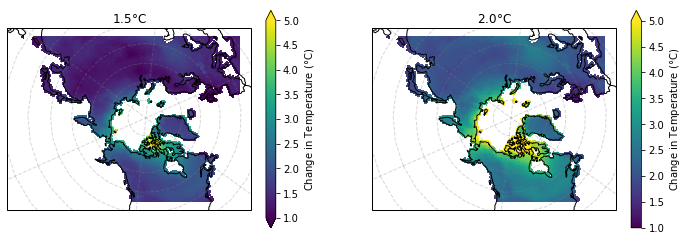

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4), subplot_kw=dict(projection=Rasm()))

plt.sca(axes[0])
tbot_diff_1pt5_rasm_mean.plot.pcolormesh('xc', 'yc', add_labels=False, 
                                         cbar_kwargs={'label': 'Change in Temperature ($\degree$C)'}, 
                                         cmap='viridis', 
                                         vmin = 1, vmax = 5, 
                                         transform=ccrs.PlateCarree())
axes[0].set_title('$1.5\degree$C')
axes[0].gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
                  linewidth=1, color='gray', alpha=0.3, linestyle='--')
axes[0].coastlines()

plt.sca(axes[1])
tbot_diff_2pt0_rasm_mean.plot.pcolormesh('xc', 'yc', add_labels=False, 
                                         cbar_kwargs={'label': 'Change in Temperature ($\degree$C)'}, 
                                         cmap='viridis', 
                                         vmin = 1, vmax = 5, 
                                         transform=ccrs.PlateCarree())
axes[1].set_title('$2.0\degree$C')
axes[1].gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
                  linewidth=1, color='gray', alpha=0.3, linestyle='--')
axes[1].coastlines()

'''fig.savefig(os.path.join(plot_direc, 
                         'tbot_mean.png'), bbox_inches='tight', dpi=dpi)'''